# K-Nearest Neighbors (KNN) (a lazy learner)

A K-Nearest Neighbors classifier doesn't really learn a model at all. Instead, to determine the label for an unknown sample, it finds the K data points from the training set closest to the unlabeled sample (the K nearest neighbors) and assigns the majority label among the nearest neighbors.

![knn - JC Chouinard](../images/knn.png)

### Eager vs Lazy models

 - *Eager learners* spend more time and resources training a *simple* model that generalizes and prediction is quick and not computationally intensive (simple, quick, and computationally intensive are all relative).

 - *Lazy learners* store data and do most of the computation at the time of prediction. Lazy learners are slower to predict, but they are also adaptable to new data because the training overhead is low.

 **KNN is a very lazy learner!**

### Hyper parameters of KNN

<a href = "https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html"> sklearn.neighbors.KNeighborsClassifier </a>


 - ```n_neighbors``` - number of neighbors (why not k?! come on sklearn devs!). **Rule of thumb, start with square root of number of samples.**

    - If k is too small, the model will be too specific and won't generalize well to new data. The classifier will fit the training data well, but fail to generalize to the test set. This is called *overfitting*. 

    - If k is too large, the model will fail to predict correct labels in the training set. This is called *underfitting*.


 - ```metric``` - the metric is how distance is calculated between samples. Two common metrics to use:

    - Euclidean distance - "euclidean" - $d(p,q) = \sqrt{(p_1-q_1)^2 + (p_2-q_2)^2 + \cdots + (p_m-q_m)^2 }$ 
    
    - Manhattan distance - "manhattan" - $d(p,q) = |p_1-q_1| + |p_2-q_2| + \cdots + |p_m-q_m|^2$


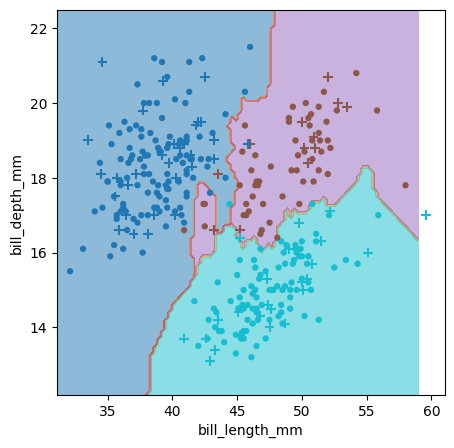

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

fig, ax = plt.subplots(1,1, figsize = (5,5))

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_boundaries = DecisionBoundaryDisplay.from_estimator(knn, X=X_train,
                                                         xlabel = 'bill_length_mm',
                                                         ylabel = 'bill_depth_mm',
                                                         response_method = 'predict',
                                                         cmap = cmap, alpha = 0.5,
                                                         ax=ax)

ax.scatter(X_train['bill_length_mm'], X_train['bill_depth_mm'], 
            c = z_train, cmap=cmap,
            marker = '.', s = 50, label = label_names)
ax.scatter(X_test['bill_length_mm'], X_test['bill_depth_mm'], 
            c = z_test, cmap = cmap,
            marker = '+', s=50)

plt.show()

### Example: MNIST

The MNIST data set comprises small images (8x8 pixels) of hand-written digits. We'll apply KNN as a classifier to determine which digit a hand-written image represents.

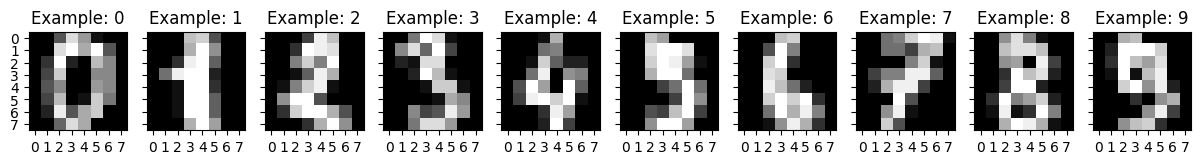

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3), sharey=True)

for ax, image, label in zip(axes, digits['images'], digits['target']):
    ax.set_xticks(range(0,8))
    ax.set_yticks(range(0,8))

    ax.imshow(image, cmap=plt.cm.gist_gray, interpolation="nearest")
    ax.set_title(f'Example: {label}')

Each image is composed of 64 pixels with values from 0-15. Each image is a data point and each pixel value will be a feature of our data. To work with these images, we'll want to unfurl them from an 8x8 square matrix to an array of 64 elements.

The custom functions unfurl_imageset and refurl_imageset will let us go back and forth between the image and vector formats.

In [ ]:
def unfurl_imageset(image_set):
    if len(image_set.shape)==2:
        num_images = 1
    else:
        num_images = len(image_set)
    return image_set.reshape((num_images, -1))

def refurl_imageset(vector_set, image_size):
    if len(vector_set.shape)==1:
        return vector_set.reshape((image_size[0], image_size[1]))    
    else:
        num_vectors = len(vector_set)
        return vector_set.reshape((num_vectors, image_size[0], image_size[1]))

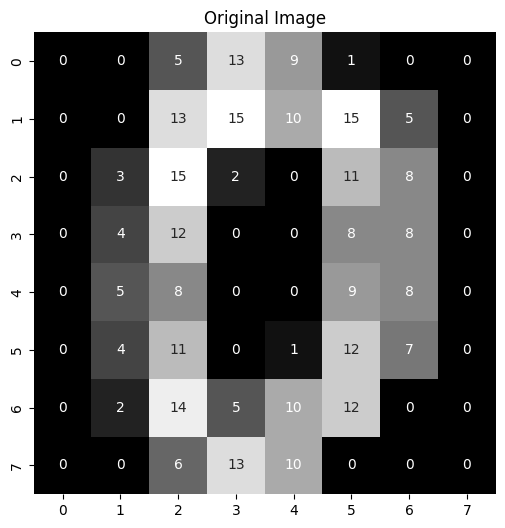

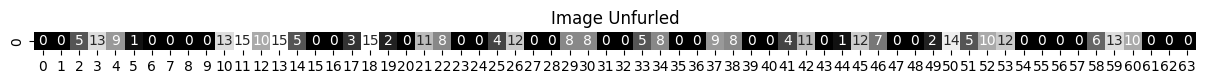

In [ ]:

vector_0 = unfurl_imageset(digits['images'][0])

fig, ax0 = plt.subplots(1,1, figsize = (6, 6))
image_cmap = plt.cm.gist_gray

sns.heatmap(digits['images'][0], annot = True,
            cmap=image_cmap, cbar = False,
            ax = ax0)
ax0.set_aspect('equal')
ax0.set_title('Original Image')

fig, ax1 = plt.subplots(1,1, figsize = (15, 5))
sns.heatmap(vector_0, annot = True,
            cmap=image_cmap, cbar = False,
            ax = ax1)
ax1.set_aspect('equal')
ax1.set_title('Image Unfurled')
plt.show()


In [ ]:
X = unfurl_imageset(digits['images'])
y = digits['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

pca = PCA(n_components = 64)
P_train = pca.fit_transform(X_train)
P_test = pca.transform(X_test)


/Users/eatai/.pyenv/versions/datascience/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/eatai/.pyenv/versions/datascience/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/eatai/.pyenv/versions/datascience/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/eatai/.pyenv/versions/datascience/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/eatai/.pyenv/versions/datascience/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/eatai/.pyenv/versions/datascience/lib/python3.13/site-packages/sklearn/decomposition/_base

In [ ]:
pca.__dict__

{'n_components': 64,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'n_features_in_': 64,
 '_fit_svd_solver': 'covariance_eigh',
 'mean_': array([0.00000000e+00, 3.04105776e-01, 5.24077940e+00, 1.17814892e+01,
        1.18956159e+01, 5.79679889e+00, 1.32567850e+00, 1.28740431e-01,
        4.87125957e-03, 2.02226862e+00, 1.04405010e+01, 1.19123173e+01,
        1.02727905e+01, 8.16005567e+00, 1.82811413e+00, 1.06471816e-01,
        2.08768267e-03, 2.60473208e+00, 9.89004871e+00, 7.01809325e+00,
        7.12386917e+00, 7.84551148e+00, 1.78705637e+00, 4.31454419e-02,
        1.39178845e-03, 2.48503827e+00, 9.15309673e+00, 8.91231733e+00,
        9.95755045e+00, 7.56367432e+00, 2.25956855e+00, 2.78357690e-03,
        0.00000000e+00, 2.27696590e+00, 7.71259569e+00, 9.03827418e+00,
        1.03263744e+01, 8.78705637e+00, 2.91231733e+00, 0.00000000e+00,
        

In [ ]:
X.shape
P_train.shape

(1437, 64)

Text(0, 0.5, 'Explained Variance')

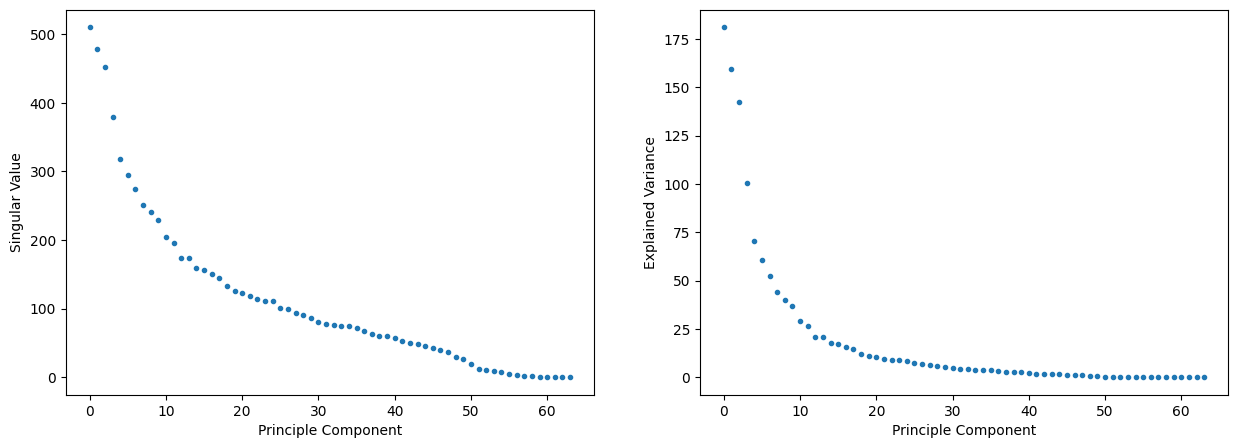

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15, 5))
ax[0].plot(pca.singular_values_, marker='.', linestyle='none')
ax[0].set_xlabel('Principle Component')
ax[0].set_ylabel('Singular Value')

ax[1].plot(pca.explained_variance_, marker='.', linestyle='none')
ax[1].set_xlabel('Principle Component')
ax[1].set_ylabel('Explained Variance')

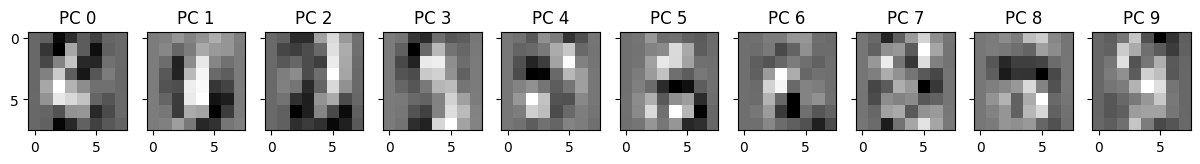

In [ ]:
fig, ax = plt.subplots(1,10, figsize = (15,4), sharey=True)

for n in range(10):
    image = refurl_imageset(pca.components_[n], [8,8])
    ax[n].imshow(image, cmap = image_cmap)
    ax[n].set_title(f'PC {n}')
    

TRAINING REPORT:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       138
           1       0.97      0.98      0.98       145
           2       0.95      0.94      0.95       137
           3       0.95      0.91      0.93       152
           4       0.97      0.99      0.98       145
           5       0.97      0.98      0.98       149
           6       0.99      0.99      0.99       142
           7       0.93      0.96      0.94       142
           8       0.91      0.89      0.90       141
           9       0.91      0.92      0.92       146

    accuracy                           0.95      1437
   macro avg       0.95      0.95      0.95      1437
weighted avg       0.95      0.95      0.95      1437

TESTING REPORT:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       0.90      0.97      0.94        37
           2       0.90      0.90      0.90  

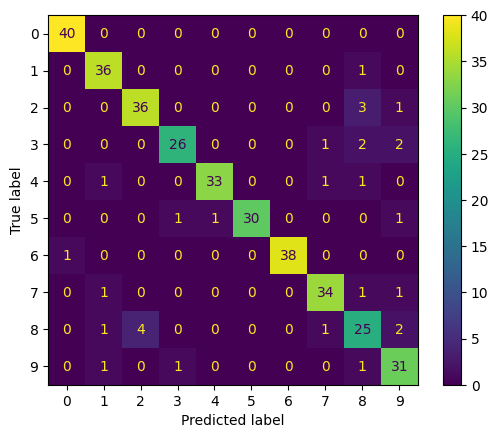

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

P_train = P_train[:,0:5]
P_test = P_test[:, 0:5]

knn_clf = KNeighborsClassifier(n_neighbors = 3)

knn_clf.fit(P_train, y_train)

y_train_pred = knn_clf.predict(P_train)
y_pred = knn_clf.predict(P_test)

cfm = confusion_matrix(y_true = y_test, y_pred=y_pred)
ConfusionMatrixDisplay(cfm).plot()

print('TRAINING REPORT:')
print(classification_report(y_train, y_train_pred))

print('TESTING REPORT:')
print(classification_report(y_test, y_pred))


What could we try to improve the prediction?